# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

In [69]:
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (15.,8.)})
sns.set_style("whitegrid")

# Librerías de modelado
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import pandas as pd
import numpy as np

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [15]:
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
student_data
student_data2 = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,6,8,4,2,9,7,0,5]})

Draw a dispersion diagram (scatter plot) for the data.

<AxesSubplot:xlabel='Age', ylabel='Tardies'>

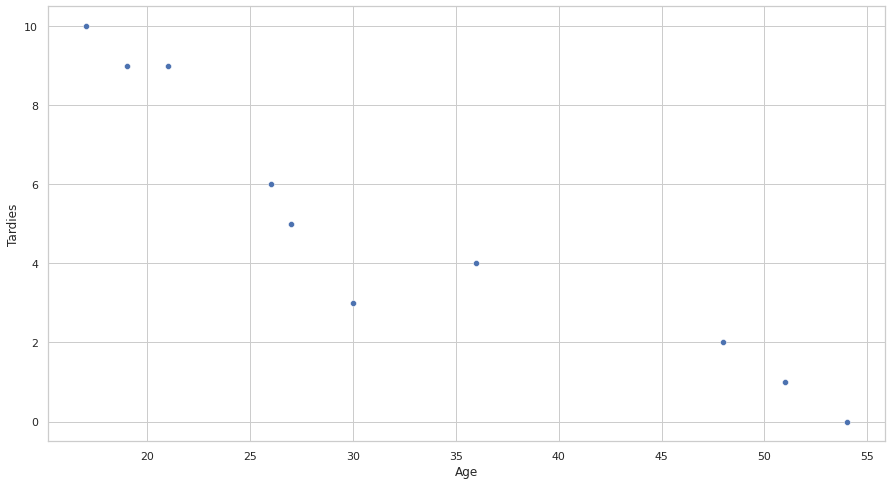

In [18]:
sns.scatterplot(x=student_data2.Age, y=student_data.Tardies)

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

Yes, you can clearly see how there seems to be a negative correlation between both factors, which will mean that the slope of the linear regression curve will be negative.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [19]:
display(student_data.corr())
student_data.cov()

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


First, we look at the correlation, which we can see its negative, and very close to -1. This means that as Age grows Tardies decreases. The closer to 1 or -1, the closer that that the relation is to being proportionally perfect. From the covariance, were only interested in the sign of the value, not the magnitude. The sign once again tells us if the relation is direct or inverse.

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [30]:
lr = LinearRegression()
lr.fit(
    X = student_data[['Tardies']],
    y = student_data.Age
)
Slope= lr.coef_[0]
PuntCort=lr.intercept_

In [33]:
student_data["prediccion"] = (student_data.Tardies * lr.coef_[0]) + lr.intercept_

In [48]:
student_data.drop('predicción', axis=1)

,Age,Tardies,prediccion
0,17,10,14.374668
1,51,1,47.066430
2,27,5,32.536758
3,21,9,18.007086
4,36,4,36.169176
5,48,2,43.434012
6,19,9,18.007086
7,26,6,28.904340
8,54,0,50.698849
9,30,3,39.801594


Plot your regression model on your scatter plot.

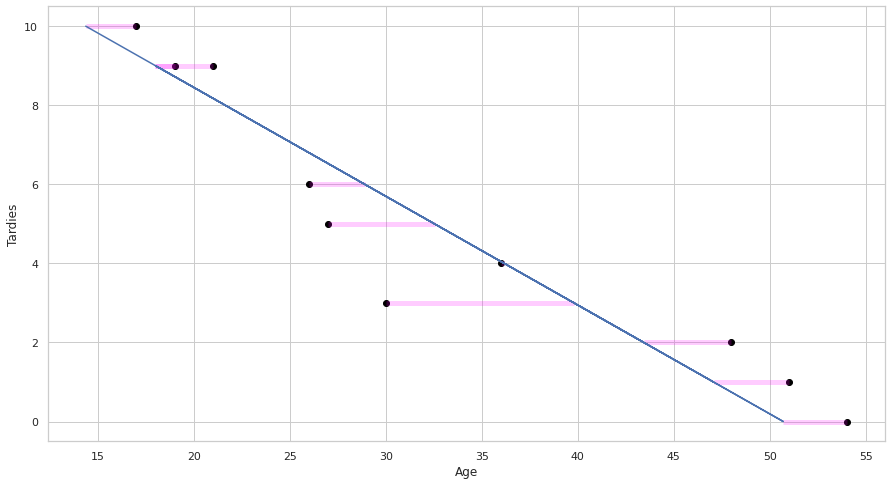

In [66]:
plt.scatter(x=student_data.Age, y=student_data.Tardies, color='black')
plt.plot(student_data.prediccion,student_data.Tardies)
plt.ylabel("Tardies")
plt.xlabel("Age")
plt.hlines(student_data.Tardies, student_data.Age, student_data.prediccion, lw=5, color='magenta', alpha=0.2)


Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

It looks like a good predictor visually, however it would be good to look at the R^2 to see how well the regression line adjusts to the data.

In [73]:
print(f"R2: ", metrics.r2_score(student_data.Age, student_data.prediccion))

R2:  0.8820265558250109


As we can see, it is a pretty high r^2, so I will conclude saying it is a good predictor.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [77]:
vehicles= pd.read_csv('vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [86]:
Vehicles= vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']]
Vehicles.corr()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


For predicting CO2 emissions probably the best predictor will be that one with a highest correlation, as it will probably give us the most fitted line. This would be Fuel Barrels/Year.

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [108]:
lm=LinearRegression()
lm.fit(X=Vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']],y= Vehicles['CO2 Emission Grams/Mile'])
print('Coefficients of betas:', lm.coef_)
print('Intercept of the model or beta 0:', lm.intercept_)

Coefficients of betas: [-0.32061673  1.87879976 19.05292507 -3.04039938  0.03230948]
Intercept of the model: 769.8882836465227


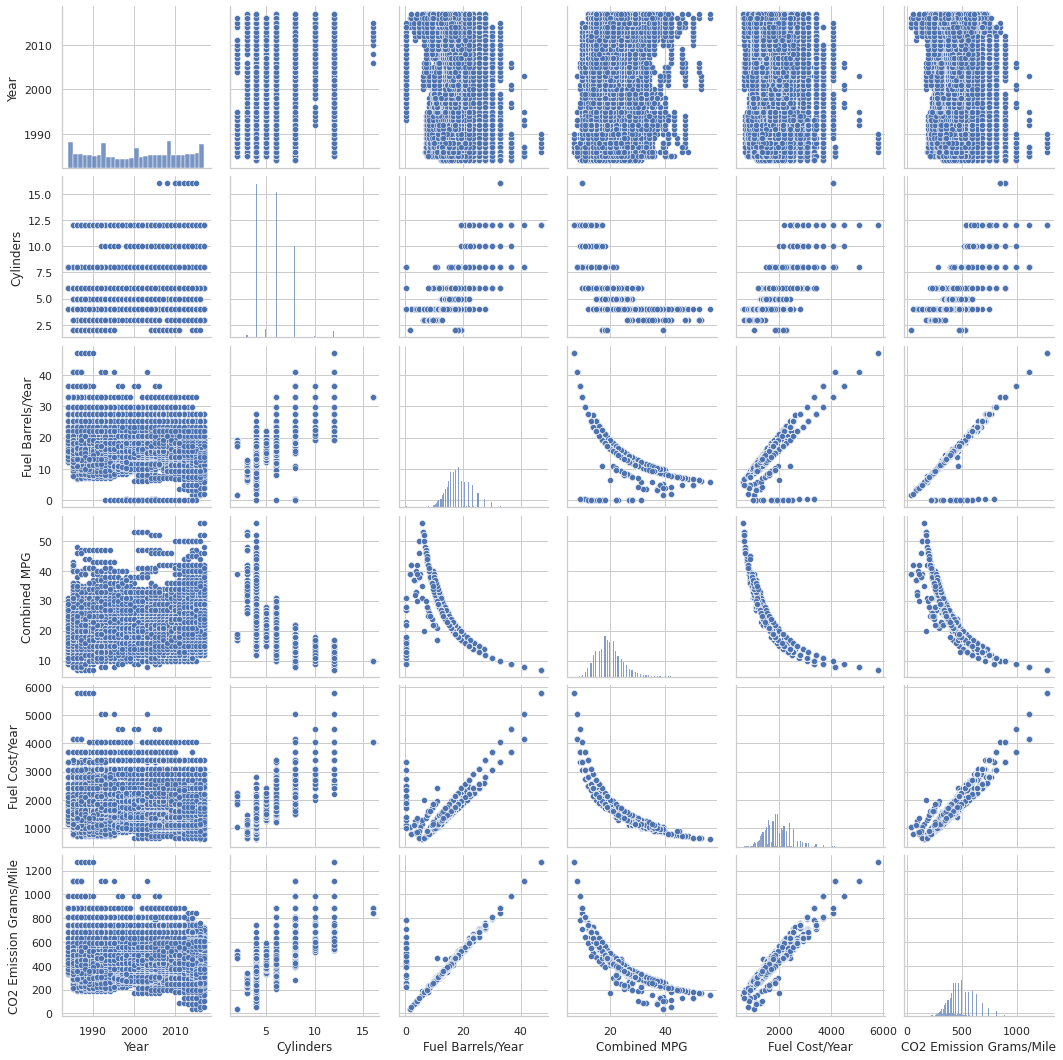

In [109]:
sns.pairplot(Vehicles)

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [121]:
columnas = list(Vehicles.columns)
diccio_nuevas = {columna: columna.replace("-" , '').lower() for columna in columnas}
Vehicles.rename(columns = diccio_nuevas, inplace=True)


/home/eduardo/anaconda3/envs/Ironhack/lib/python3.8/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [122]:
Vehicles.head()

,year,cylinders,fuelbarrelsyear,combinedmpg,fuelcostyear,co2emissiongramsmile
0,1984,4.0,19.388824,17,1950,522.764706
1,1984,6.0,25.354615,13,2550,683.615385
2,1985,4.0,20.600625,16,2100,555.437500
3,1985,6.0,25.354615,13,2550,683.615385
4,1987,6.0,20.600625,16,2550,555.437500


In [125]:
results = smf.ols("co2emissiongramsmile ~ year + cylinders+ fuelbarrelsyear+combinedmpg+fuelcostyear", data= Vehicles).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     co2emissiongramsmile   R-squared:                       0.981
Model:                              OLS   Adj. R-squared:                  0.981
Method:                   Least Squares   F-statistic:                 3.687e+05
Date:                  Tue, 23 Nov 2021   Prob (F-statistic):               0.00
Time:                          17:57:52   Log-Likelihood:            -1.5173e+05
No. Observations:                 35952   AIC:                         3.035e+05
Df Residuals:                     35946   BIC:                         3.035e+05
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         769.8883     19.392     39.702      0.000     731.880     807.897
year               -0.3206      0.010    -33.060      0.000      -0.340      -0.302
cylinders           1.8788      0.083     22.598      0.000       1.716       2.042
fuelbarrelsyear    19.0529      0.061    311.600      0.000      18.933      19.173
combinedmpg        -3.0404      0.042    -71.645      0.000      -3.124      -2.957
fuelcostyear        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This model has a very high Adjusted R^2, which will be the part of the variance of the response variable that is explained by the model.

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [143]:
data = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,13]})
lm= LinearRegression()
lm.fit(X= data[['Y']], y= data.X)
coef=lm.coef_[0]
inter=lm.intercept_


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

Text(0.5, 0, 'X')

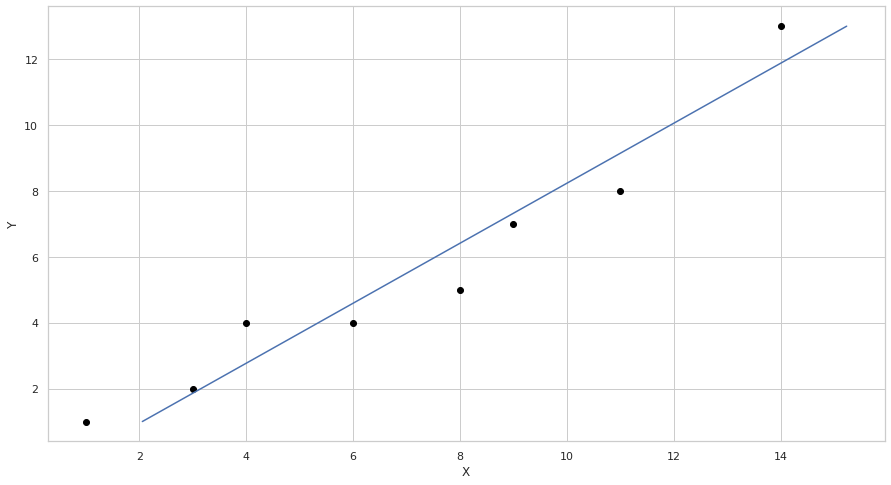

In [147]:
data["prediccion"] = (data.Y * coef) + inter
plt.scatter(x=data.X, y=data.Y, color='black')
plt.plot(data.prediccion, data.Y)
plt.ylabel("Y")
plt.xlabel("X")


In [145]:
data.head()

,X,Y,prediccion
0,1,1,2.058824
1,3,2,3.156863
2,4,4,5.352941
3,6,4,5.352941
4,8,5,6.450980


What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [148]:
results = smf.ols('Y ~ X', data=data).fit()
results.summary()

/home/eduardo/anaconda3/envs/Ironhack/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     81.81
Date:                Tue, 23 Nov 2021   Prob (F-statistic):           0.000102
Time:                        19:00:31   Log-Likelihood:                -10.800
No. Observations:                   8   AIC:                             25.60
Df Residuals:                       6   BIC:                             25.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4394      0.759     -0.579      0.584      -2.297       1.418
X              0.8485      0.094      9.045      0.000       0.619       1.078
==============================================================================
Omnibus:                        0.556   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.757   Jarque-Bera (JB):                0.514
Skew:                           0.261   Prob(JB):                        0.773
Kurtosis:                       1.873   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [149]:
data = pd.DataFrame({'X': [1,3,4,6,8,9,11], 'Y': [1,2,4,4,5,7,8]})
lm= LinearRegression()
lm.fit(X= data[['Y']], y= data.X)
coef=lm.coef_[0]
inter=lm.intercept_

Text(0.5, 0, 'X')

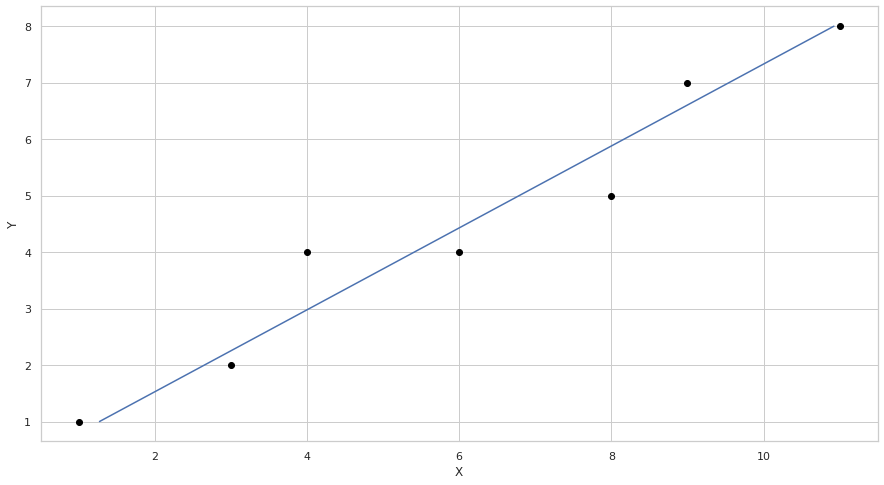

In [151]:
data["prediccion"] = (data.Y * coef) + inter
plt.scatter(x=data.X, y=data.Y, color='black')
plt.plot(data.prediccion, data.Y)
plt.ylabel("Y")
plt.xlabel("X")

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [152]:
results = smf.ols('Y ~ X', data=data).fit()
results.summary()

/home/eduardo/anaconda3/envs/Ironhack/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     83.31
Date:                Tue, 23 Nov 2021   Prob (F-statistic):           0.000264
Time:                        19:03:16   Log-Likelihood:                -5.7771
No. Observations:                   7   AIC:                             15.55
Df Residuals:                       5   BIC:                             15.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3233      0.513      0.630      0.556      -0.996       1.642
X              0.6842      0.075      9.127      0.000       0.492       0.877
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.689
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.379
Skew:                           0.284   Prob(JB):                        0.827
Kurtosis:                       2.012   Cond. No.                         14.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The main difference betweeen these two models is that if we remove what we would call an 'outlier', which it really isn't but it is the the one with the biggest distance to the regression line; this will give us a more precise model. We can see this in the R^2 and the adjusted R^2, which is still greater, even though it has suffered the penalty for removing variables.